In [24]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.casedeck import*
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *
from hermes3.balance1d import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Glimmer I/O

In [25]:
b_ds = pd.read_csv('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients/1_D/presentation/b_total_data.csv')

In [26]:
print(b_ds)

    x_par (m)  x_pol (m)  B_total (T)
0      85.572     3.9429     9.577238
1      86.148     4.0660     9.652444
2      86.735     4.1862     9.776986
3      87.343     4.3031     9.947501
4      87.989     4.4164    10.159642
..        ...        ...          ...
59    175.350     5.8162    12.294688
60    175.760     5.8183    12.280356
61    176.140     5.8202    12.267290
62    176.500     5.8219    12.255394
63    176.820     5.8234    12.244578

[64 rows x 3 columns]


0.3340244183367888


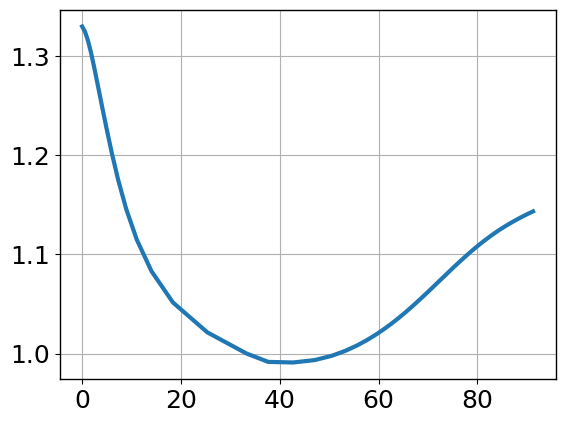

In [69]:
xpoint_loc = 119

x_ratio = (xpoint_loc - 90)/(b_ds['x_par (m)'].values[-1] - 90)
print(x_ratio)


flux_expansion_profile = 2.0 + (-1*b_ds['B_total (T)']/b_ds['B_total (T)'][np.argmin(np.abs(b_ds['x_par (m)'] - xpoint_loc))])
x = b_ds['x_par (m)'] - b_ds['x_par (m)'][0]


plt.plot(x, flux_expansion_profile, label='B_total (T)', linewidth=linewidth)

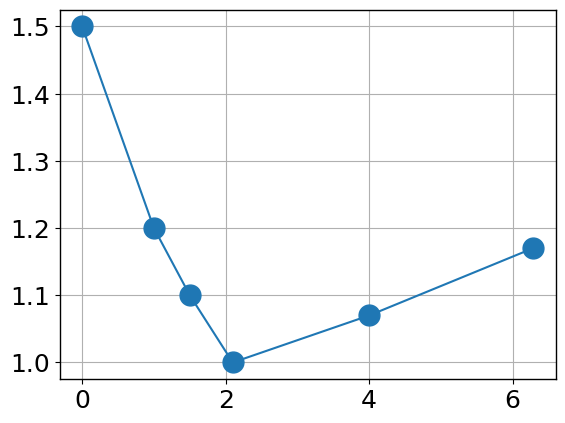

In [76]:
flux_exp = np.array([1.5, 1.2, 1.1, 1.0, 1.07, 1.17])


x_lin = np.linspace(0,2*np.pi, len(flux_exp))

x_lin[1] = 1
x_lin[2] = 1.5
x_lin[3] = (2*np.pi)*0.3340244183367888
x_lin[4] = 4

x_exp = np.array([90, 100, 119, 150, 160, 176]) - 90


plt.plot(x_lin, flux_exp, 'o', label='Experimental', markersize=markersize, linestyle='-')

Fitted Polynomial Coefficients:
coef0= 1.507171
coef1= -0.430367
coef2= 0.114355
coef3= -0.008653


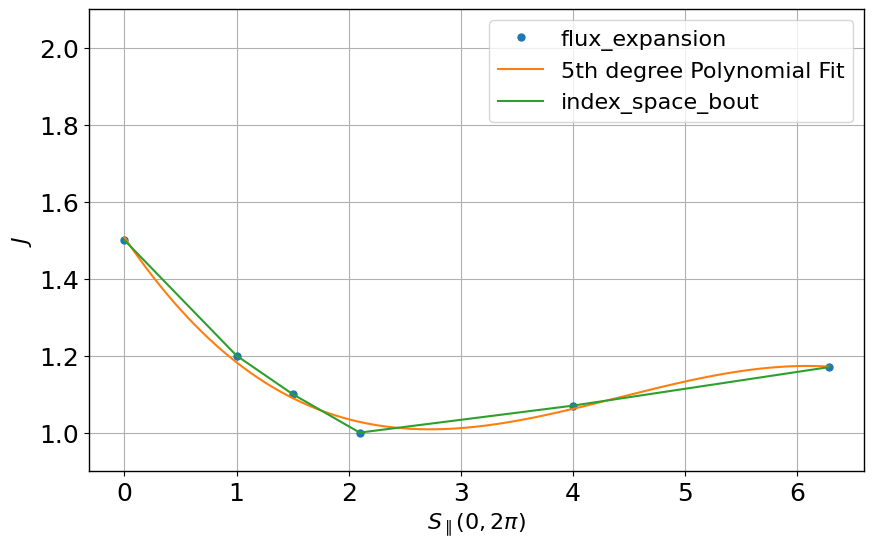

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Replace these with your actual data


x_data = x_lin  # Add your x values here
y_data = flux_exp

# Fit a 10th-degree polynomial
nth_poly = 5
coefficients = np.polyfit(x_data, y_data, 3)

# Generate the polynomial function
polynomial = np.poly1d(coefficients)

# Evaluate the polynomial for plotting
x_fit = np.linspace(min(x_data), max(x_data), 400)
y_fit = polynomial(x_fit)

# Print coefficients
print("Fitted Polynomial Coefficients:")
for i, coef in enumerate(coefficients[::-1]):
    print(f"coef{i}= {coef:.6f}")

# Plot the data and the fitted polynomial
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label="flux_expansion", markersize=5)
plt.plot(x_fit, y_fit, '-', label=f"{nth_poly}th degree Polynomial Fit")
plt.plot(x_lin, flux_exp, label = 'index_space_bout')
plt.ylabel(r'$J$')
plt.xlabel(r"$S_{\parallel} (0 , 2\pi)$")
plt.legend()
plt.grid(True)
plt.ylim(0.9, 2.1)
plt.show()
